In [1]:
import pandas as pd
import os, sys
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
working_dir = r'../../../../outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Tour Stops
Number of Trips per Tour

## First Half Tour (Outbound)
Trips part of first tour leg (to primary destination).

### All Purposes

In [4]:
fname = 'tour_stops_outbound'
df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))

df_model['source'] = 'Model'
df_survey['source'] = 'Survey'
df = df_model.append(df_survey)

source,Model,Survey
tripsh1,,
1,84.25%,79.33%
2,12.32%,13.70%
3,2.56%,4.51%
4,0.57%,1.16%
5,0.19%,0.57%


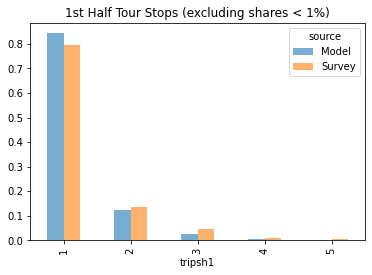

In [5]:
pd.options.display.float_format = "{:,.2%}".format
_df = df.assign(tripsh1 = lambda df: df.tripsh1.astype(int).astype(str)).pivot_table(index='tripsh1', columns='source', values='toexpfac', aggfunc='sum')
_df = _df.fillna(0)
_df['Model'] = _df['Model']/_df['Model'].sum()
_df['Survey'] = _df['Survey']/_df['Survey'].sum()
_df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
_df.plot(kind='bar', alpha=0.6, title='1st Half Tour Stops (excluding shares < 1%)')
for col in ['Model','Survey']:
    _df[col] = _df[col].apply(format_percent)
_df

## Pierce County

Pierce County
source   County  Model  Survey
tripsh1                       
1        Pierce 16.61%  15.22%
2        Pierce  2.44%   2.72%
3        Pierce  0.52%   0.87%
4        Pierce  0.11%   0.36%


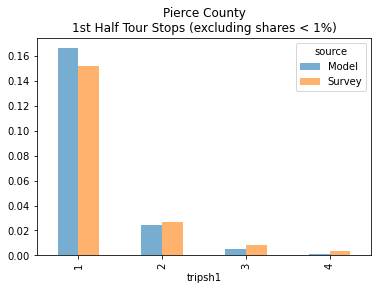

In [6]:
_df = df.rename(columns={'person_county':'County'}).assign(tripsh1 = lambda df: df.tripsh1.astype(int).astype(str)).pivot_table(index=['County','tripsh1'], columns='source', values='toexpfac', aggfunc='sum')
_df = _df.fillna(0)
_df['Model'] = _df['Model']/_df['Model'].sum()
_df['Survey'] = _df['Survey']/_df['Survey'].sum()
_df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
_df = _df.reset_index(level='County')

for county, df_county in _df.groupby('County'):
    if county=='Pierce':
        print(county + ' County')
        df_county.plot(kind='bar', alpha=0.6, title=county + ' County\n1st Half Tour Stops (excluding shares < 1%)')
        print(df_county)

## Other Counties

King County
source  County  Model  Survey
tripsh1                      
1         King 46.36%  43.94%
2         King  6.75%   7.01%
3         King  1.38%   1.67%
4         King  0.31%   0.55%
5         King  0.10%   0.21%
Kitsap County


source   County  Model  Survey
tripsh1                       
1        Kitsap  5.13%   5.10%
2        Kitsap  0.76%   1.18%
3        Kitsap  0.16%   0.84%
Snohomish County
source      County  Model  Survey
tripsh1                          
1        Snohomish 16.16%  15.07%
2        Snohomish  2.38%   2.80%
3        Snohomish  0.50%   1.13%
4        Snohomish  0.11%   0.11%


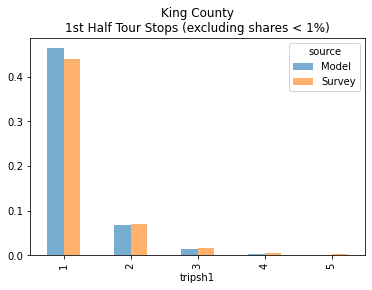

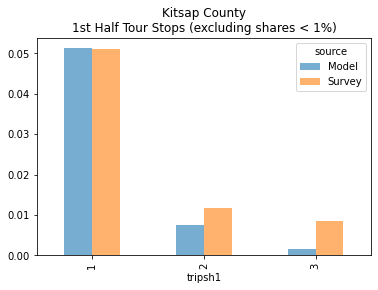

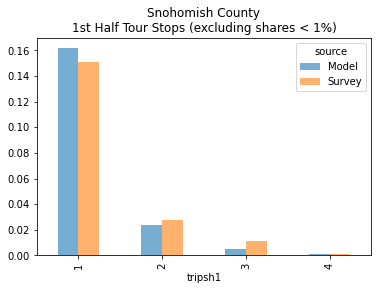

In [7]:
for county, df_county in _df.groupby('County'):
    if county!='Pierce':
        print(county + ' County')
        df_county.plot(kind='bar', alpha=0.6, title=county + ' County\n1st Half Tour Stops (excluding shares < 1%)')
        print(df_county)

### By Purpose

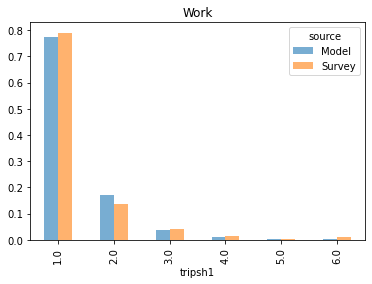

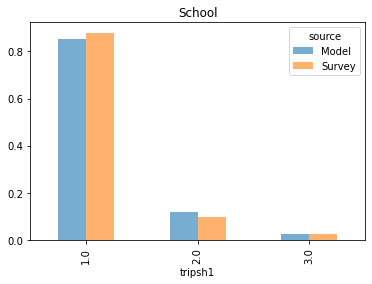

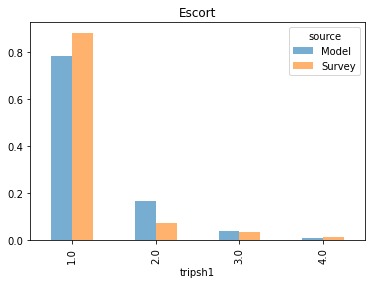

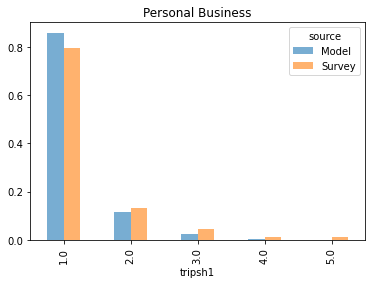

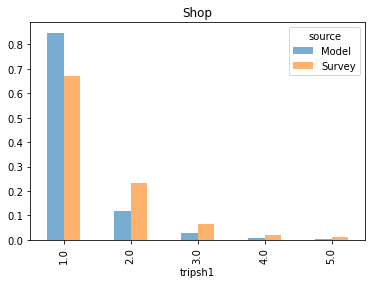

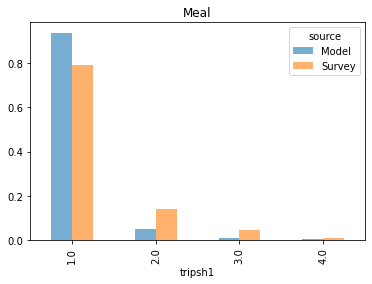

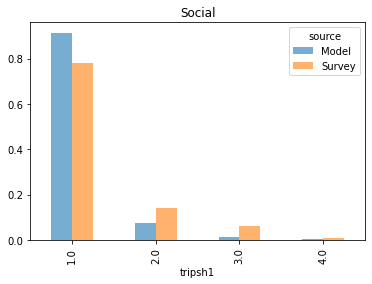

In [8]:
for purp in df['pdpurp'].unique():
    _df = df[df['pdpurp'] == purp]
    _df = _df.pivot_table(index='tripsh1', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)


## Pierce County

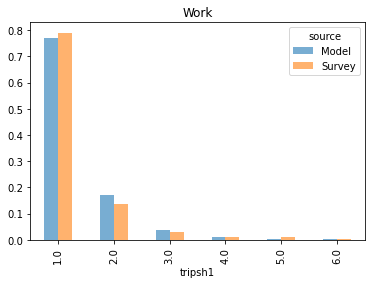

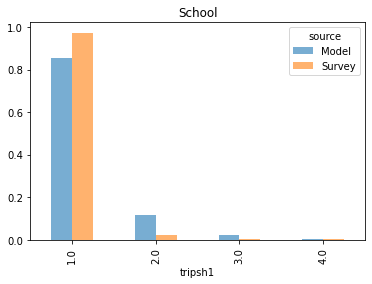

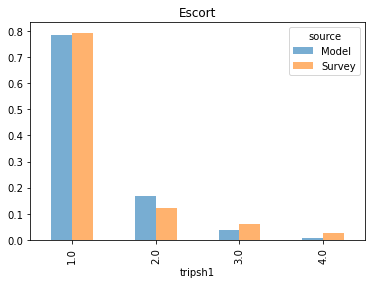

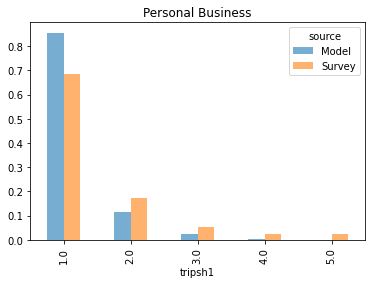

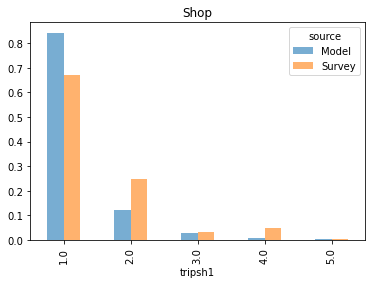

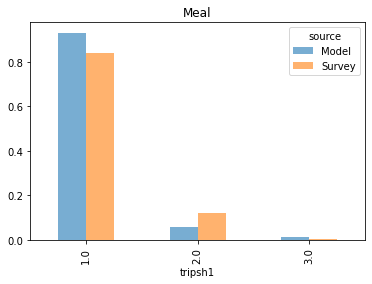

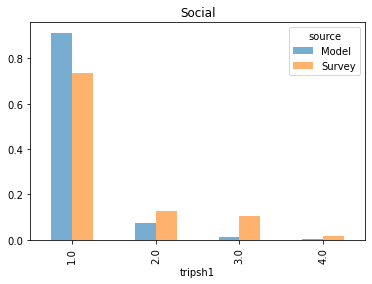

In [9]:
for purp in df['pdpurp'].unique():
    _df = df[(df['pdpurp'] == purp) & (df['person_county']=='Pierce')]
    _df = _df.pivot_table(index='tripsh1', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)

## Other Counties

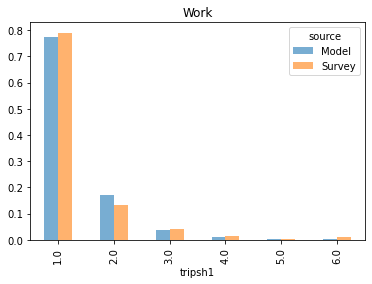

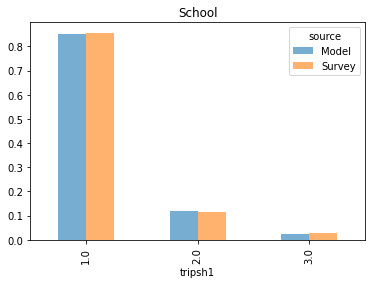

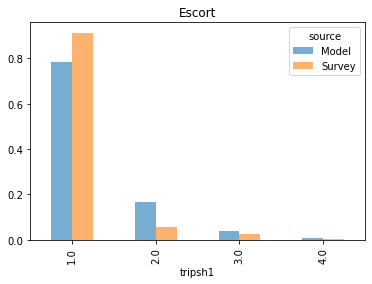

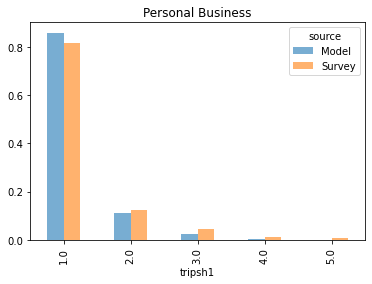

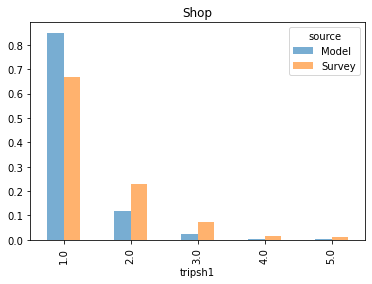

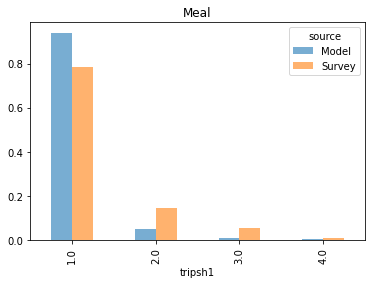

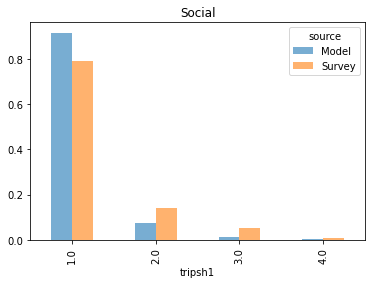

In [10]:
for purp in df['pdpurp'].unique():
    _df = df[(df['pdpurp'] == purp) & (df['person_county'] != 'Pierce')]
    _df = _df.pivot_table(index='tripsh1', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)

## Second Half Tour (Return/Inbound)

### All Purposes

source,Model,Survey
tripsh2,,
1,74.53%,71.05%
2,19.19%,18.90%
3,4.87%,5.81%
4,0.96%,2.45%
5,0.29%,1.03%


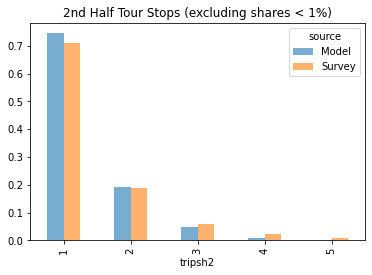

In [11]:
_df = df.assign(tripsh2 = lambda df: df.tripsh2.astype(int).astype(str)).pivot_table(index='tripsh2', columns='source', values='toexpfac', aggfunc='sum')
_df = _df.fillna(0)
_df['Model'] = _df['Model']/_df['Model'].sum()
_df['Survey'] = _df['Survey']/_df['Survey'].sum()
_df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
_df.plot(kind='bar', alpha=0.6, title='2nd Half Tour Stops (excluding shares < 1%)')
for col in ['Model','Survey']:
    _df[col] = _df[col].apply(format_percent)
_df

## Pierce County

Pierce County
source   County  Model  Survey
tripsh2                       
1        Pierce 14.80%  13.39%
2        Pierce  3.73%   3.62%
3        Pierce  0.94%   1.49%
4        Pierce  0.18%   0.89%


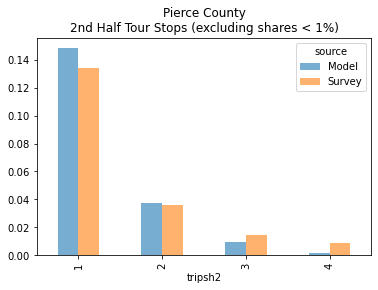

In [12]:
_df = df.rename(columns={'person_county':'County'}).assign(tripsh2 = lambda df: df.tripsh2.astype(int).astype(str)).pivot_table(index=['County','tripsh2'], columns='source', values='toexpfac', aggfunc='sum')
_df = _df.fillna(0)
_df['Model'] = _df['Model']/_df['Model'].sum()
_df['Survey'] = _df['Survey']/_df['Survey'].sum()
_df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
_df = _df.reset_index(level='County')

for county, df_county in _df.groupby('County'):
    if county=='Pierce':
        print(county + ' County')
        df_county.plot(kind='bar', alpha=0.6, title=county + ' County\n2nd Half Tour Stops (excluding shares < 1%)')
        print(df_county)

## Other Counties

King County
source  County  Model  Survey
tripsh2                      
1         King 40.83%  38.46%
2         King 10.63%  10.75%
3         King  2.71%   2.54%
4         King  0.54%   1.00%
5         King  0.16%   0.59%
Kitsap County


source   County  Model  Survey
tripsh2                       
1        Kitsap  4.55%   4.95%
2        Kitsap  1.17%   1.46%
3        Kitsap  0.29%   0.47%
Snohomish County
source      County  Model  Survey
tripsh2                          
1        Snohomish 14.35%  14.25%
2        Snohomish  3.66%   3.07%
3        Snohomish  0.93%   1.31%
4        Snohomish  0.18%   0.43%


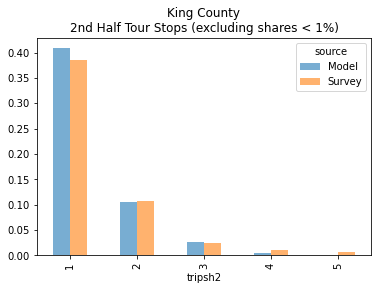

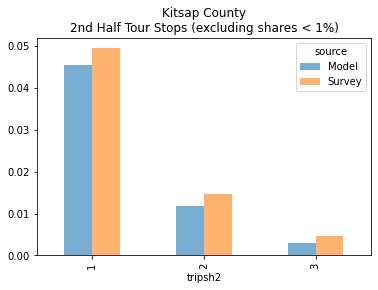

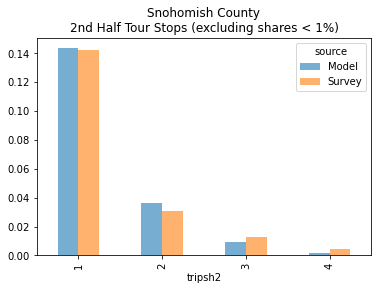

In [13]:
for county, df_county in _df.groupby('County'):
    if county!='Pierce':
        print(county + ' County')
        df_county.plot(kind='bar', alpha=0.6, title=county + ' County\n2nd Half Tour Stops (excluding shares < 1%)')
        print(df_county)

### By Purpose

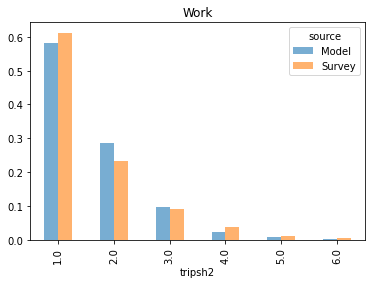

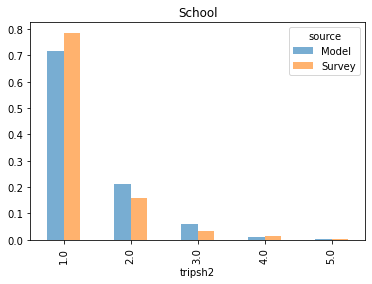

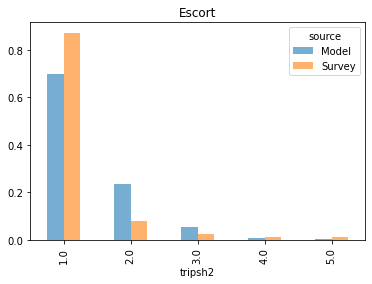

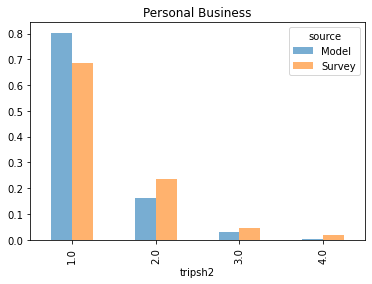

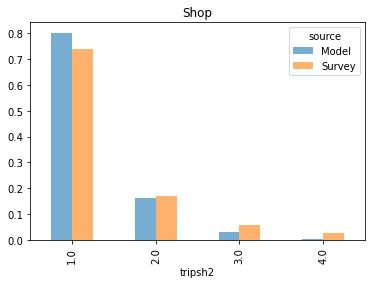

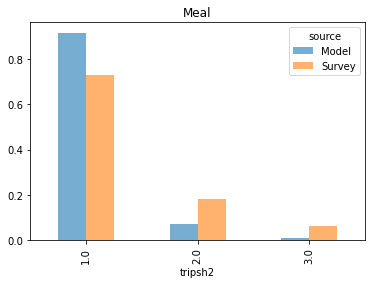

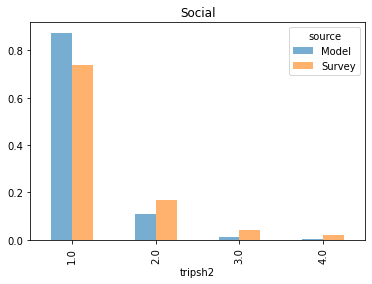

In [14]:
for purp in df['pdpurp'].unique():
    _df = df[(df['pdpurp'] == purp)]
    _df = _df.pivot_table(index='tripsh2', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)

## Pierce County

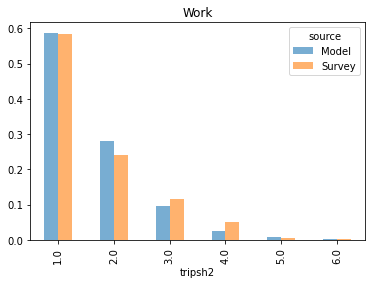

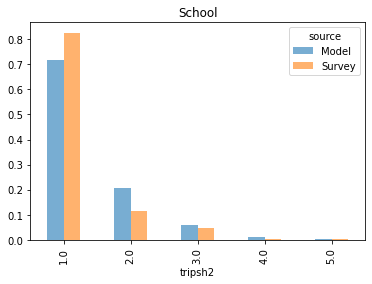

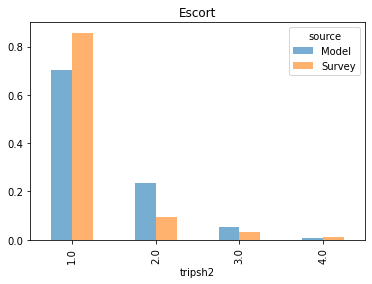

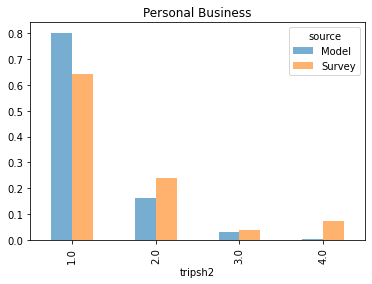

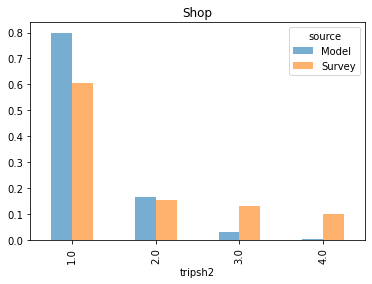

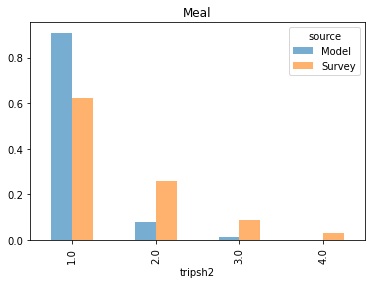

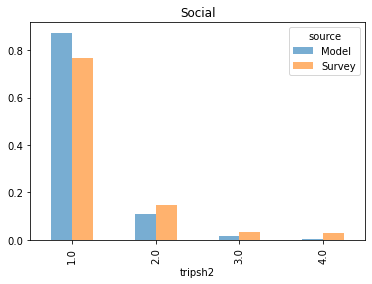

In [15]:
for purp in df['pdpurp'].unique():
    _df = df[(df['pdpurp'] == purp) & (df['person_county'] == 'Pierce')]
    _df = _df.pivot_table(index='tripsh2', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)


## Other Counties

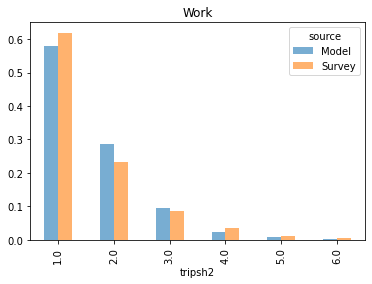

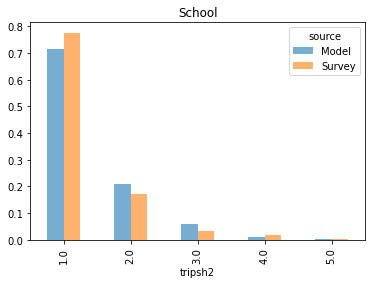

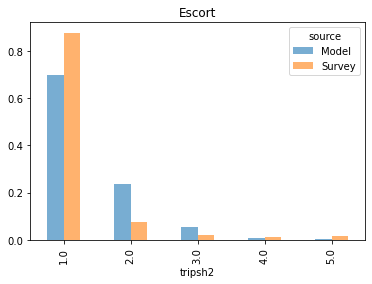

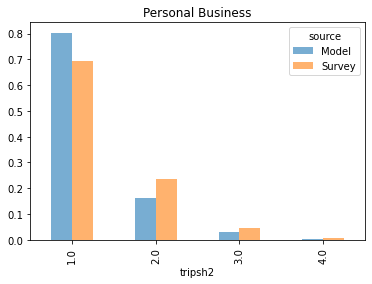

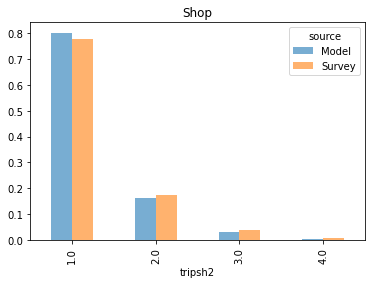

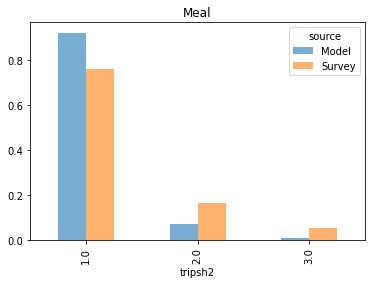

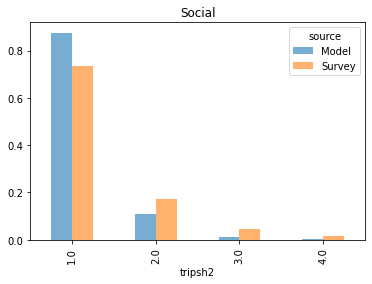

In [16]:
for purp in df['pdpurp'].unique():
    _df = df[(df['pdpurp'] == purp) & (df['person_county'] != 'Pierce')]
    _df = _df.pivot_table(index='tripsh2', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)


# All Stops

### All Purposes

source,Model,Survey
all_stops,,
200.00%,66.19%,59.76%
300.00%,20.66%,21.30%
400.00%,8.60%,9.46%
500.00%,2.90%,5.06%
600.00%,1.00%,1.78%
700.00%,0.33%,1.07%
800.00%,0.13%,0.80%


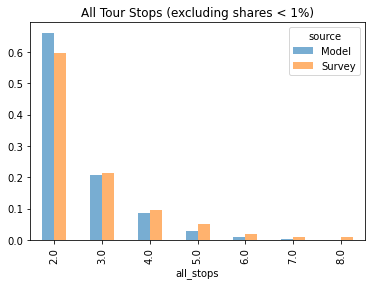

In [17]:
df['all_stops'] = df['tripsh1'] + df['tripsh2']
_df = df.pivot_table(index='all_stops', columns='source', values='toexpfac', aggfunc='sum')
_df = _df.fillna(0)
_df['Model'] = _df['Model']/_df['Model'].sum()
_df['Survey'] = _df['Survey']/_df['Survey'].sum()
_df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
_df.plot(kind='bar', alpha=0.6, title='All Tour Stops (excluding shares < 1%)')
for col in ['Model','Survey']:
    _df[col] = _df[col].apply(format_percent)
_df

## Pierce County

Pierce County
source     County  Model  Survey
all_stops                       
2          Pierce 13.13%  11.06%
3          Pierce  4.02%   3.95%
4          Pierce  1.69%   2.15%
5          Pierce  0.57%   1.29%
6          Pierce  0.19%   0.56%


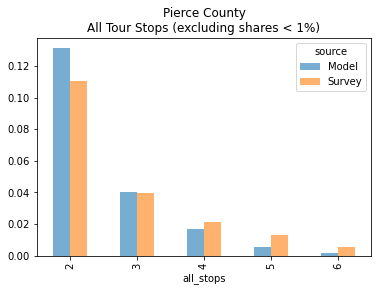

In [18]:
_df = df.rename(columns={'person_county':'County'}).assign(all_stops = lambda df: df.all_stops.astype(int).astype(str)).pivot_table(index=['County','all_stops'], columns='source', values='toexpfac', aggfunc='sum')
_df = _df.fillna(0)
_df['Model'] = _df['Model']/_df['Model'].sum()
_df['Survey'] = _df['Survey']/_df['Survey'].sum()
_df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
_df = _df.reset_index(level='County')

for county, df_county in _df.groupby('County'):
    if county=='Pierce':
        print(county + ' County')
        df_county.plot(kind='bar', alpha=0.6, title=county + ' County\nAll Tour Stops (excluding shares < 1%)')
        print(df_county)

## Other Counties

Pierce County


source     County  Model  Survey
all_stops                       
2          Pierce 13.13%  11.06%
3          Pierce  4.02%   3.95%
4          Pierce  1.69%   2.15%
5          Pierce  0.57%   1.29%
6          Pierce  0.19%   0.56%


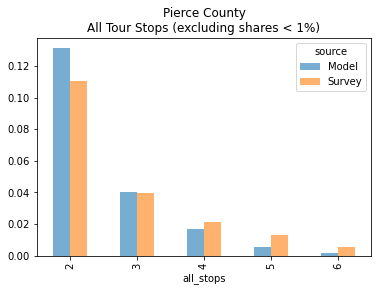

In [19]:
for county, df_county in _df.groupby('County'):
    if county=='Pierce':
        print(county + ' County')
        df_county.plot(kind='bar', alpha=0.6, title=county + ' County\nAll Tour Stops (excluding shares < 1%)')
        print(df_county)

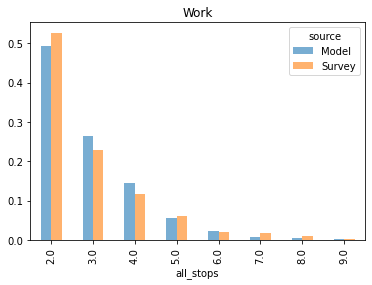

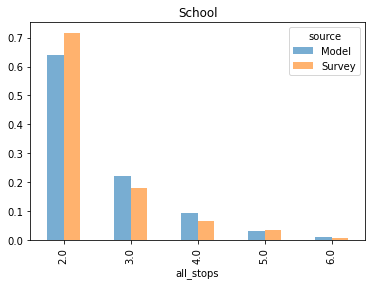

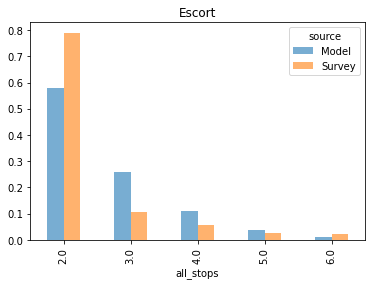

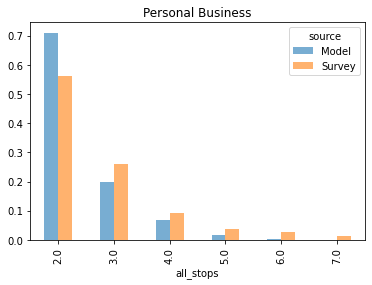

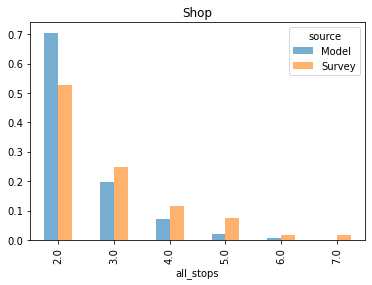

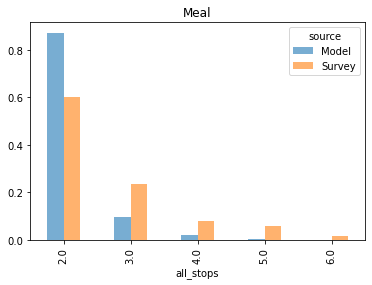

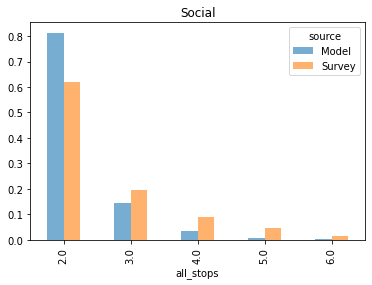

In [20]:
for purp in df['pdpurp'].unique():
    _df = df[df['pdpurp'] == purp]
    _df = _df.pivot_table(index='all_stops', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)


## Pierce County

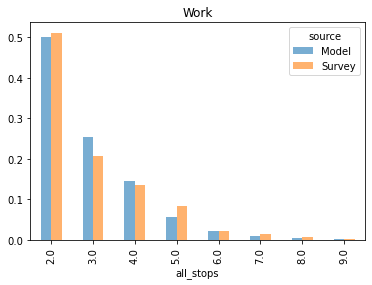

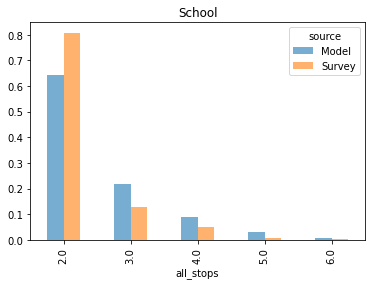

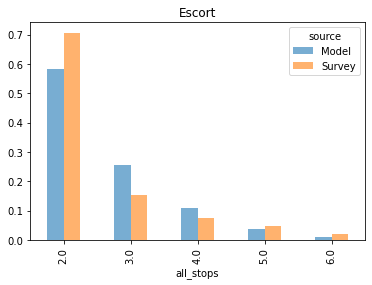

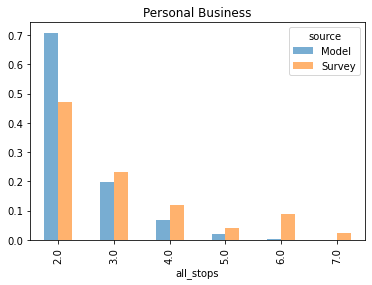

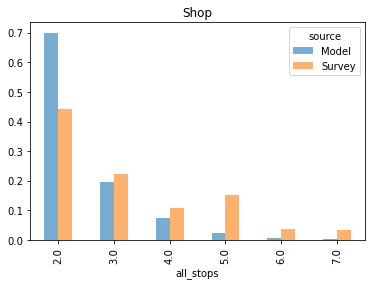

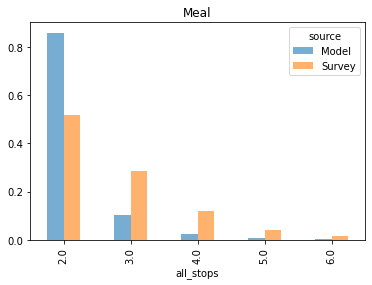

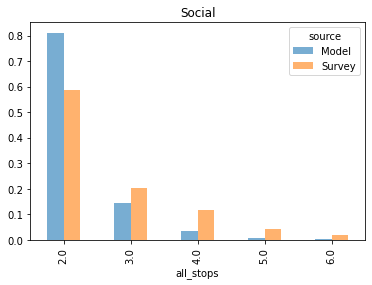

In [21]:
for purp in df['pdpurp'].unique():
    _df = df[(df['pdpurp'] == purp) & (df['person_county'] == 'Pierce')]
    _df = _df.pivot_table(index='all_stops', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)

## Other Counties

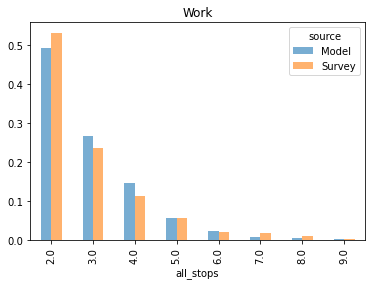

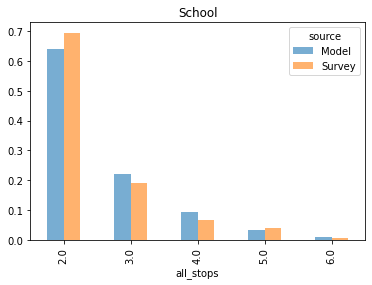

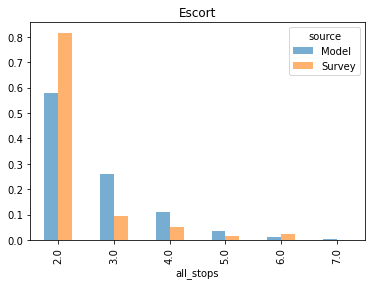

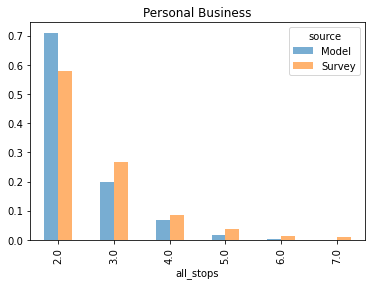

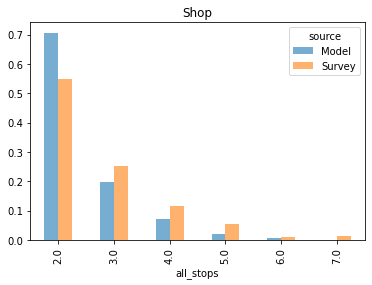

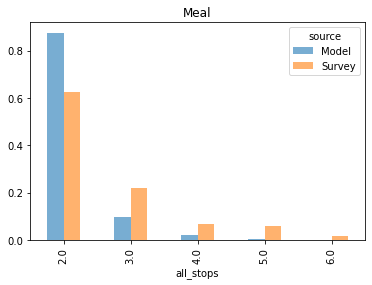

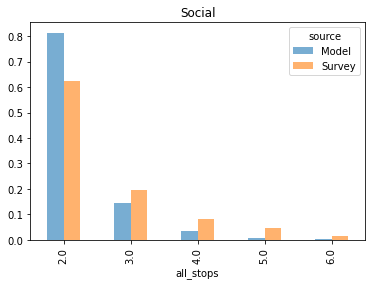

In [22]:
for purp in df['pdpurp'].unique():
    _df = df[(df['pdpurp'] == purp) & (df['person_county'] != 'Pierce')]
    _df = _df.pivot_table(index='all_stops', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)